In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter as format

In [55]:
df = pd.read_csv("Data_Tanaman_Padi_Indonesia_2018-2023_Erlin_New.csv")
df

,Province,Year,Harvested Area,Production,Rainfall,Humidity,Temperature
0,Aceh,2018,329516,1861567,2336,81,28
1,Aceh,2019,310012,1714438,1437,82,27
2,Aceh,2020,317869,1757313,1790,76,29
3,Aceh,2021,297058,1634640,2293,76,29
4,Aceh,2022,271750,1509456,1834,76,29
...,...,...,...,...,...,...,...
199,Papua,2019,54132,235340,1823,77,28
200,Papua,2020,52728,166002,1502,75,28
201,Papua,2021,64985,286280,2028,76,28
202,Papua,2022,49742,193944,2576,84,28


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Province        204 non-null    object
 1   Year            204 non-null    int64 
 2   Harvested Area  204 non-null    int64 
 3   Production      204 non-null    int64 
 4   Rainfall        204 non-null    int64 
 5   Humidity        204 non-null    int64 
 6   Temperature     204 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 11.3+ KB


In [54]:
df.describe()

,Year,Harvested Area,Production,Rainfall,Humidity,Temperature
count,204.000000,2.040000e+02,2.040000e+02,204.000000,204.000000,204.000000
mean,2020.500000,3.126199e+05,1.623743e+06,2555.210784,80.230392,27.921569
std,1.712026,4.735449e+05,2.682466e+06,834.901557,3.966716,0.953978
min,2018.000000,1.390000e+02,4.230000e+02,490.000000,67.000000,25.000000
25%,2019.000000,5.226425e+04,2.300308e+05,2086.750000,78.000000,27.000000
50%,2020.500000,1.112275e+05,5.310985e+05,2555.000000,80.000000,28.000000
75%,2022.000000,3.126992e+05,1.560927e+06,2958.500000,83.000000,29.000000
max,2023.000000,1.821983e+06,1.049959e+07,5332.000000,91.000000,30.000000


In [56]:
df.isnull().sum()

Province          0
Year              0
Harvested Area    0
Production        0
Rainfall          0
Humidity          0
Temperature       0
dtype: int64

In [57]:
df['mean_prod']=df['Production']/34
df['mean_humid']=df['Humidity']/34
df['mean_temp']=df['Temperature']/34
df['mean_rainf']=df['Rainfall']/34

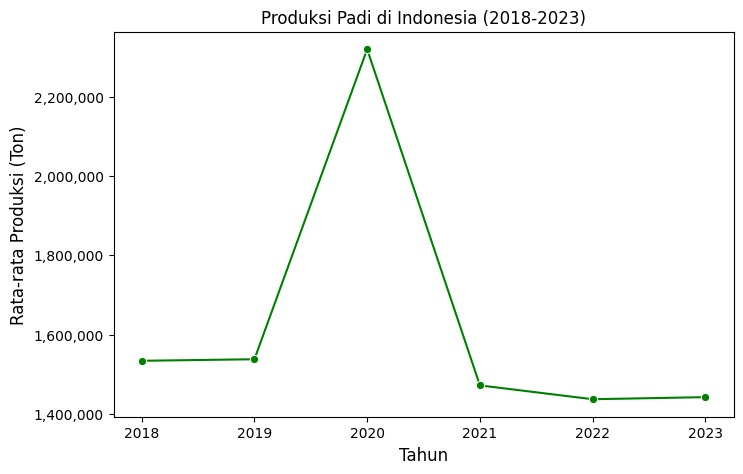

In [58]:
def number_formatter(x, pos): 
    return f'{int(x):,}'
plt.figure(figsize=(8, 5))
def prod():
    tahun = df.groupby('Year').sum()
    sns.lineplot(data=tahun, x='Year', y='mean_prod', marker='o',color='green')
    plt.title('Produksi Padi di Indonesia (2018-2023)', fontsize=12)
    plt.xlabel('Tahun', fontsize=12)
    plt.ylabel('Rata-rata Produksi (Ton)', fontsize=12)
    plt.gca().yaxis.set_major_formatter(format(number_formatter))
prod()
plt.show()


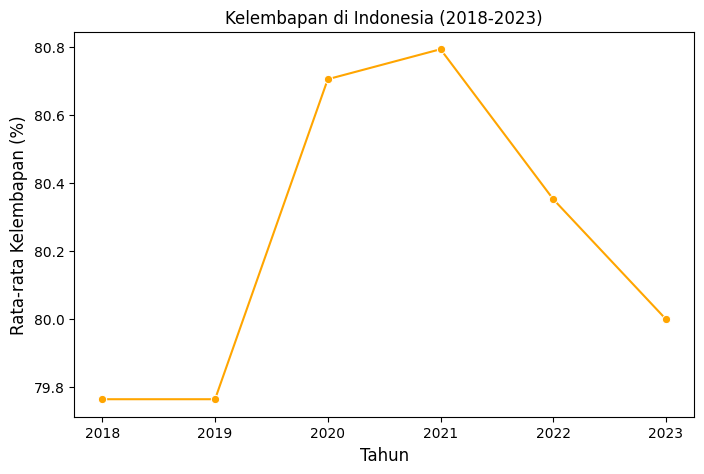

In [46]:
plt.figure(figsize=(8, 5))
def humid():
    tahun = df.groupby('Year').sum()
    sns.lineplot(data=tahun, x='Year', y='mean_humid', marker='o', color='orange')
    plt.title('Kelembapan di Indonesia (2018-2023)', fontsize=12)
    plt.xlabel('Tahun', fontsize=12)
    plt.ylabel('Rata-rata Kelembapan (%)', fontsize=12)
humid()
plt.show()

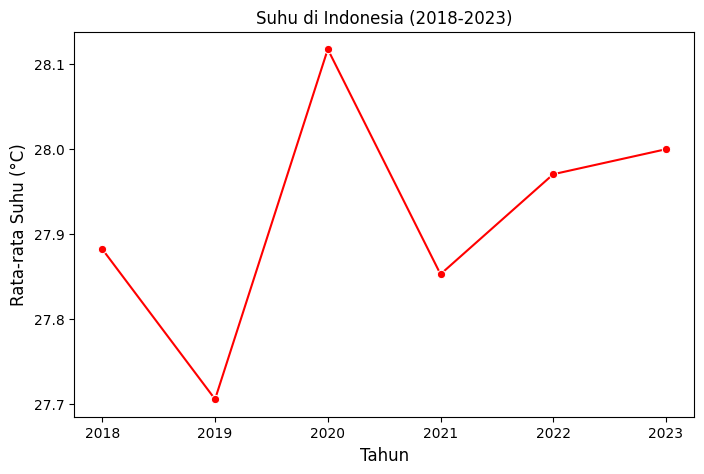

In [47]:
plt.figure(figsize=(8, 5))
def temp():
    tahun = df.groupby('Year').sum()
    sns.lineplot(data=tahun, x='Year', y='mean_temp', marker='o', color='red')
    plt.title('Suhu di Indonesia (2018-2023)', fontsize=12)
    plt.xlabel('Tahun', fontsize=12)
    plt.ylabel('Rata-rata Suhu (°C)', fontsize=12)
temp()
plt.show()

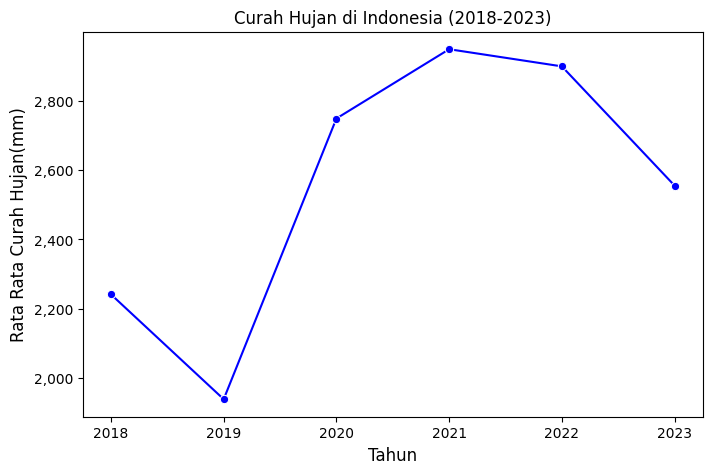

In [48]:
def number_formatter(x, pos): 
    return f'{int(x):,}'
plt.figure(figsize=(8, 5))
def rainf():
    tahun = df.groupby('Year').sum()
    sns.lineplot(data=tahun, x='Year', y='mean_rainf', marker='o', color='blue')
    plt.title('Curah Hujan di Indonesia (2018-2023)', fontsize=12)
    plt.xlabel('Tahun', fontsize=12)
    plt.ylabel('Rata Rata Curah Hujan(mm)', fontsize=12)
    plt.gca().yaxis.set_major_formatter(format(number_formatter))
rainf()
plt.show()

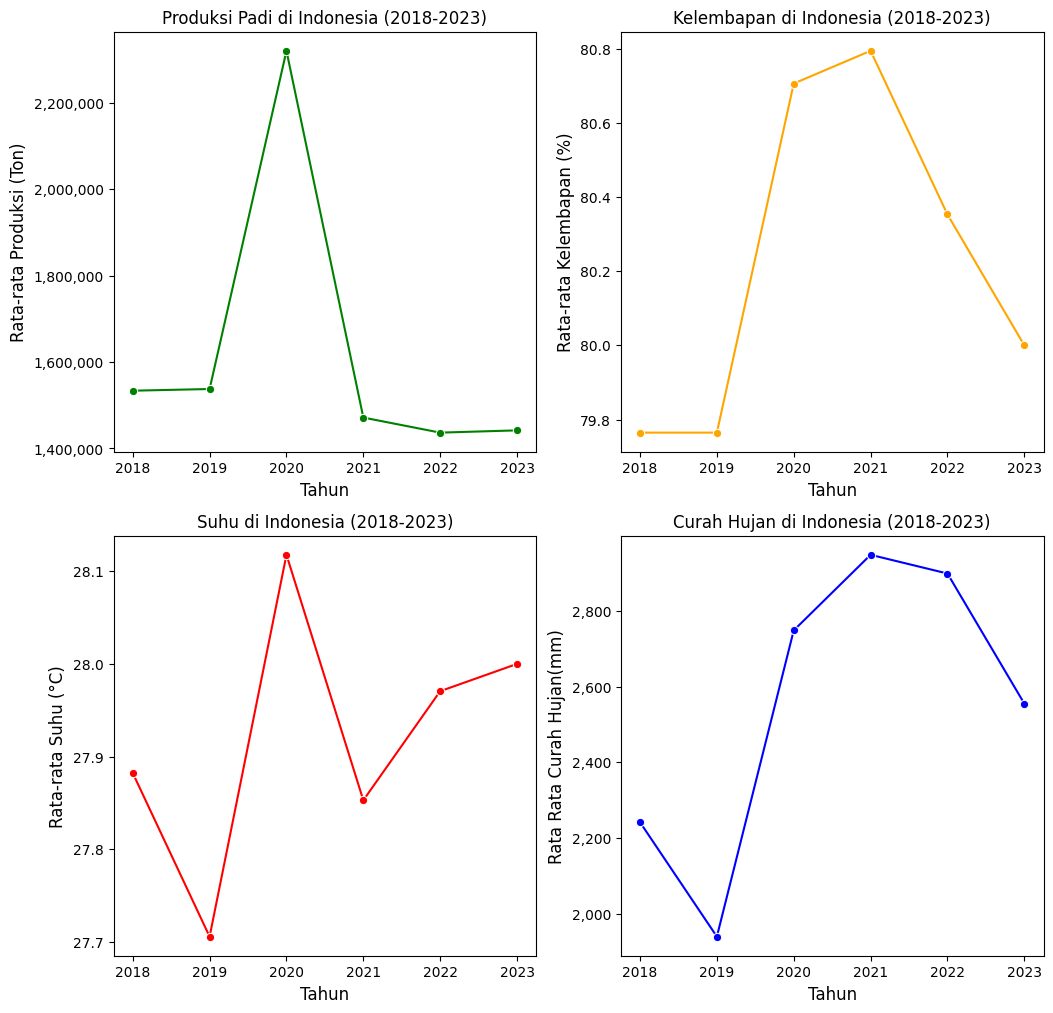

In [35]:

plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
prod()
plt.subplot(2, 2, 2)
humid()
plt.subplot(2, 2, 3)
temp()

plt.subplot(2, 2, 4)
rainf()

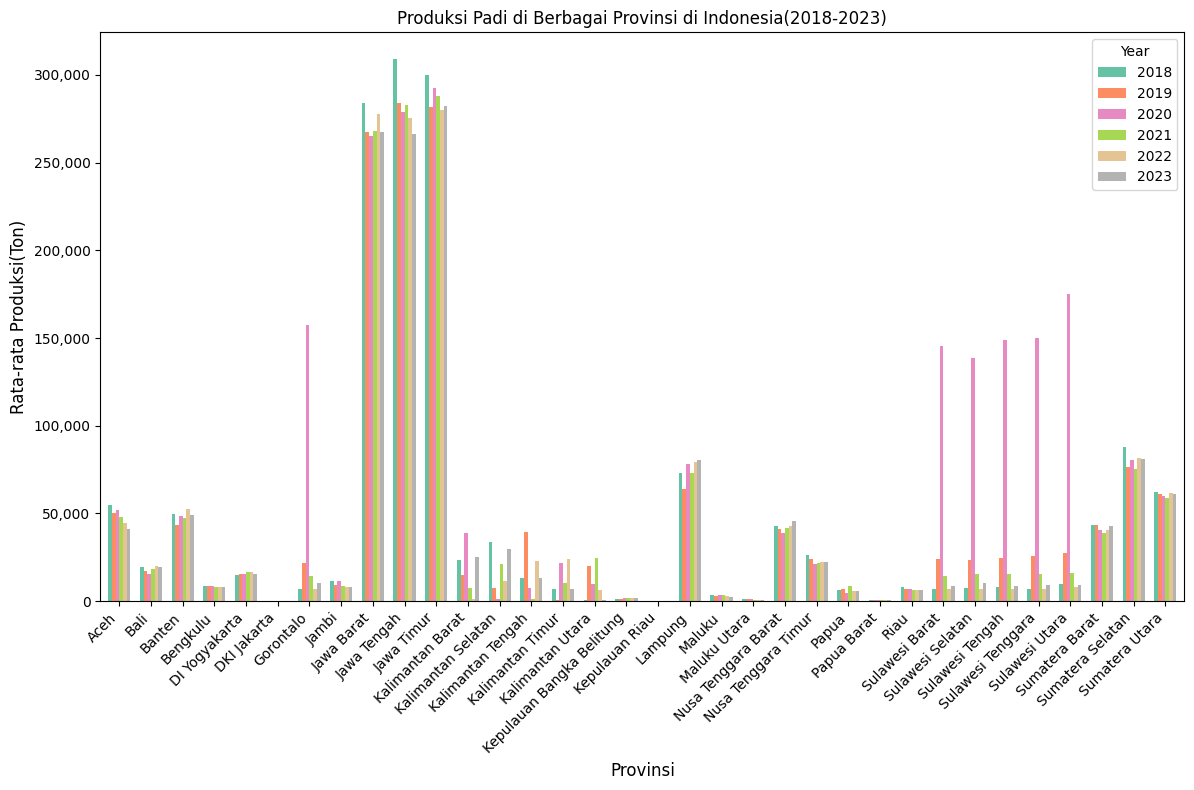

In [26]:
def number_formatter(x, pos): 
    return f'{int(x):,}'
grouped_data = df.groupby(['Province', 'Year'])['mean_prod'].sum().reset_index()
pivot = grouped_data.pivot(index='Province', columns='Year', values='mean_prod')
pivot.plot(kind='bar', figsize=(12, 8), colormap='Set2', width=0.7)

plt.title('Produksi Padi di Berbagai Provinsi di Indonesia(2018-2023)', fontsize=12)
plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Rata-rata Produksi(Ton)', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.gca().yaxis.set_major_formatter(format(number_formatter))
plt.show()
